In [11]:
import numpy as np
import pandas as pd
from IPython.display import display

from collections import Counter
import ast
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import nltk

In [12]:
news=pd.read_csv("news.csv")

In [3]:
news

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [33]:
headline = news['headline_text']
date = news['publish_date']


In [34]:
headline.index=date

In [7]:
headline.index

Int64Index([20030219, 20030219, 20030219, 20030219, 20030219, 20030219,
            20030219, 20030219, 20030219, 20030219,
            ...
            20171231, 20171231, 20171231, 20171231, 20171231, 20171231,
            20171231, 20171231, 20171231, 20171231],
           dtype='int64', name='publish_date', length=1103665)

In [15]:
date

0          20030219
1          20030219
2          20030219
3          20030219
4          20030219
5          20030219
6          20030219
7          20030219
8          20030219
9          20030219
10         20030219
11         20030219
12         20030219
13         20030219
14         20030219
15         20030219
16         20030219
17         20030219
18         20030219
19         20030219
20         20030219
21         20030219
22         20030219
23         20030219
24         20030219
25         20030219
26         20030219
27         20030219
28         20030219
29         20030219
             ...   
1103635    20171231
1103636    20171231
1103637    20171231
1103638    20171231
1103639    20171231
1103640    20171231
1103641    20171231
1103642    20171231
1103643    20171231
1103644    20171231
1103645    20171231
1103646    20171231
1103647    20171231
1103648    20171231
1103649    20171231
1103650    20171231
1103651    20171231
1103652    20171231
1103653    20171231


All frequencies, including STOPWORDS:
     Word  Frequency
0      to     214199
1      in     135979
2     for     130237
3      of      80758
4      on      73035
5    over      50302
6     the      49787
7  police      35985
8      at      31720
9    with      29676

All frequencies, not including STOPWORDS:
        Word  Frequency
0     police      35985
1        new      29087
2        man      28109
3       says      20001
4         us      17536
5       govt      16935
6      court      16383
7    council      16363
8  interview      15025
9       fire      13908


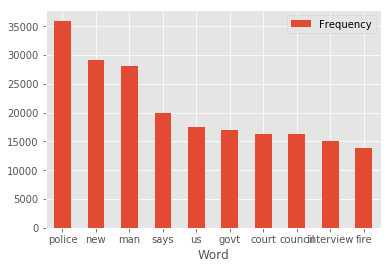

In [22]:
top_N = 10

df = pd.read_csv('news.csv',
                 usecols=['headline_text'])

txt = df.headline_text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

print('\nAll frequencies, not including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

In [36]:
#Converting date from Int64Index to DateTimeIndex
date2 = pd.to_datetime(date, format='%Y%m%d')

In [16]:
#converting date, which is DatetimeIndex to dataframe
dataf=pd.DataFrame(data=date)

In [37]:
dataf
headline.index=date2

In [19]:
#Converting each string to a numerical vector using CountVectorizer
#Create nxK document-term matrix, where n= headlines (document), K= distinct words
from sklearn.feature_extraction.text import CountVectorizer
import random
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = headline.sample(n=10000, random_state=0).as_matrix()

rand=random.randint(0,10000)

print('Headline before vectorization: ', small_text_sample[rand])

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample) #removes stopwords from small_text_sample

print('Headline after vectorization: \n', small_document_term_matrix[rand])

#small_document_term_matrix is training data

# The fit_transform method applies to feature extraction objects such as CountVectorizer and TfidfTransformer.
# The "fit" part applies to the feature extractor itself:
# it determines what features it will base future transformations on. The "transform" part is what takes the data and spits some transformed data back at you. 
# For instance, let's say you have a CountVectorizer Object. 
# Well, you call fit_transform for this object on some collection of strings.
# What it does is tokenize the strings and give you a vector for each string, 
# each dimension of which corresponds to the number of times a token is found in the corresponding string.
# Most of the entries in all of the vectors will be zero, since only the entries which correspond to tokens 
# found in that specific string will have positive values, but the vector is as long as the total number of tokens for the whole corpus. 


# So, fit_transform has both determined which tokens it will count,
# and how they correspond to entries in the count vector. It also gives you the count vectors for the training data. 


Headline before vectorization:  activists still awaiting details of charges lawyer
Headline after vectorization: 
   (0, 993)	1
  (0, 368)	1
  (0, 6353)	1
  (0, 3282)	1
  (0, 2187)	1


C:\Users\AS0C76546\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Latent Dirichilet Allocation

In [53]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics=8
lda_model = LatentDirichletAllocation(learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [61]:
#helper functions
def get_keys(topic_matrix):
    '''returns an integer list of predicted topic categories for a given topic matrix'''
    keys = []
    for i in range(topic_matrix.shape[0]):
        keys.append(topic_matrix[i].argmax())
    return keys

def keys_to_counts(keys):
    '''returns a tuple of topic categories and their accompanying magnitudes for a given list of keys'''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''returns a list of n_topic strings, where each string contains the n most common 
        words in a predicted category, in order'''
    top_word_indices = []
    for topic in range(big_lda_model.n_components):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words


In [55]:
#taking argmax of each entry in topic matrix
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)


In [56]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i), top_n_words_lda[i])

Topic 0:  new world cup australia national final abc melbourne arrested victory
Topic 1:  govt market crash death help win dead police election new
Topic 2:  health rural dies residents year mental search adelaide river laws
Topic 3:  interview sa hospital country hour work funds appeal police league
Topic 4:  court woman wins trial house centre face sydney farmers killed
Topic 5:  man police water charged hit minister government pay faces land
Topic 6:  council new plan qld nsw wa group says report school
Topic 7:  coast gold day power new years case open indigenous support
Topic 8:  says public car talks probe future union labor mp new
Topic 9:  police murder charges child guilty jailed man new abuse assault


Text(0.5,1,'LDA Topic Category Counts')

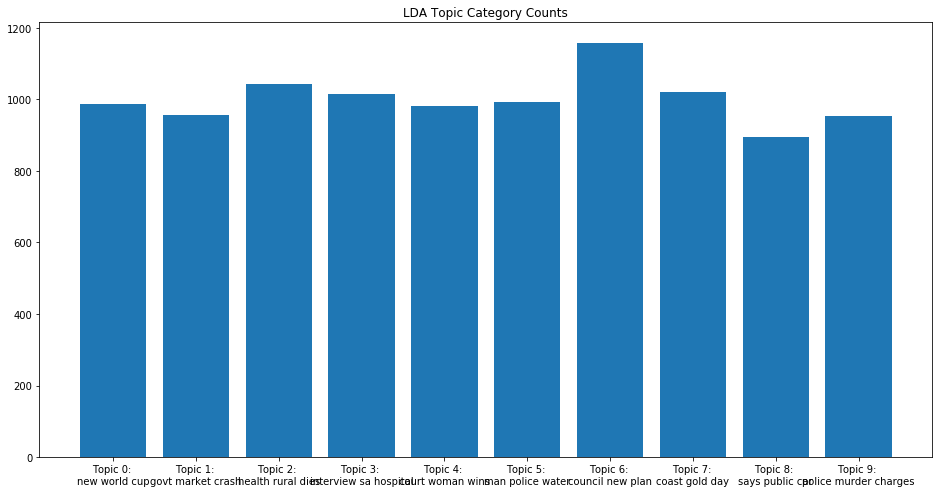

In [57]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts)
ax.set_xticks(lda_categories)
ax.set_xticklabels(labels)
ax.set_title('LDA Topic Category Counts')

# Scaling 

In [59]:

big_sample_size = 100000 

big_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
big_text_sample = headline.sample(n=big_sample_size, random_state=0).as_matrix()
big_document_term_matrix = big_count_vectorizer.fit_transform(big_text_sample)

big_lda_model = LatentDirichletAllocation(learning_method='online', verbose=1)
big_lda_model.fit(big_document_term_matrix)

C:\Users\AS0C76546\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [60]:
lda_topic_matrix_big = lda_model.fit_transform(big_document_term_matrix)
#argmax
lda_keys1 = get_keys(lda_topic_matrix_big)
lda_categories, lda_counts = keys_to_counts(lda_keys1)

top_n_words_lda1 = get_top_n_words(10, lda_keys1, big_document_term_matrix, big_count_vectorizer)

for i in range(len(top_n_words_lda1)):
    print("Topic {}: ".format(i), top_n_words_lda1[i])

Topic 0:  police court new child abc centre minister charges school nt
Topic 1:  coast gold day new wins election open china year trial
Topic 2:  crash says pm drug power police attack probe laws future
Topic 3:  man charged country hour dies face sa set hit police
Topic 4:  council plan killed urged murder farmers car fears union police
Topic 5:  says death group government guilty plans talks workers wa help
Topic 6:  water rural win market missing melbourne labor news dead public
Topic 7:  new health nsw qld report calls indigenous sex funding boost
Topic 8:  interview govt world cup sydney hospital australia accused claims new
Topic 9:  australian home south house residents west adelaide new police lead


In [63]:
yearly_data = []
for i in range(2003,2017):
    yearly_data.append(headline['{}'.format(i)].as_matrix())

yearly_topic_matrices = []
for year in yearly_data:
    document_term_matrix = big_count_vectorizer.transform(year)
    topic_matrix = big_lda_model.transform(document_term_matrix)
    yearly_topic_matrices.append(topic_matrix)

yearly_keys = []
for topic_matrix in yearly_topic_matrices:
    yearly_keys.append(get_keys(topic_matrix))
    
yearly_counts = []
for keys in yearly_keys:
    categories, counts = keys_to_counts(keys)
    yearly_counts.append(counts)

yearly_topic_counts = pd.DataFrame(np.array(yearly_counts), index=range(2003,2017))
yearly_topic_counts.columns = ['Topic {}'.format(i) for i in range(big_lda_model.n_components)]

print(yearly_topic_counts)

C:\Users\AS0C76546\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


      Topic 0  Topic 1  Topic 2  Topic 3  Topic 4  Topic 5  Topic 6  Topic 7  \
2003     7534     6770     5835     6305     5397     7422     6387     6470   
2004     7626     7551     8325     6570     6232     6713     6790     6513   
2005     7351     6691     6976     8938     7465     7763     8495     6067   
2006     5654     8742     5975     6957     5625     6714     6129     8038   
2007     7780     7304     7580     9778     9422     6168     7690     6983   
2008     8539     9655     6922     7922     8760     7385     7983     7821   
2009     8968     7582     7494     7346     7387     7581     8659     7879   
2010     7018     9611     6674     7512     7381     7459     6892     8609   
2011     9207     8332     8084     6834     7732     7457     7308     7330   
2012     9745     8464     8497     8953     8973     8209     8446    10304   
2013     9474     9111     8059    10621     9731     9984     8774     9098   
2014    10711     8030     7712     8651

In [67]:
complete_keys = [key for year in yearly_keys for key in year]
complete_topic_matrix = np.concatenate(yearly_topic_matrices)
complete_document_term_matrix = big_count_vectorizer.transform(headline.as_matrix())

top_n_words = get_top_n_words(1, complete_keys, complete_document_term_matrix, big_count_vectorizer)
for i in range(len(top_n_words)):
    print("Topic {}: ".format(i), top_n_words[i])


C:\Users\AS0C76546\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Topic 0:  health
Topic 1:  nsw
Topic 2:  australian
Topic 3:  police
Topic 4:  interview
Topic 5:  govt
Topic 6:  australia
Topic 7:  new
Topic 8:  says
Topic 9:  council


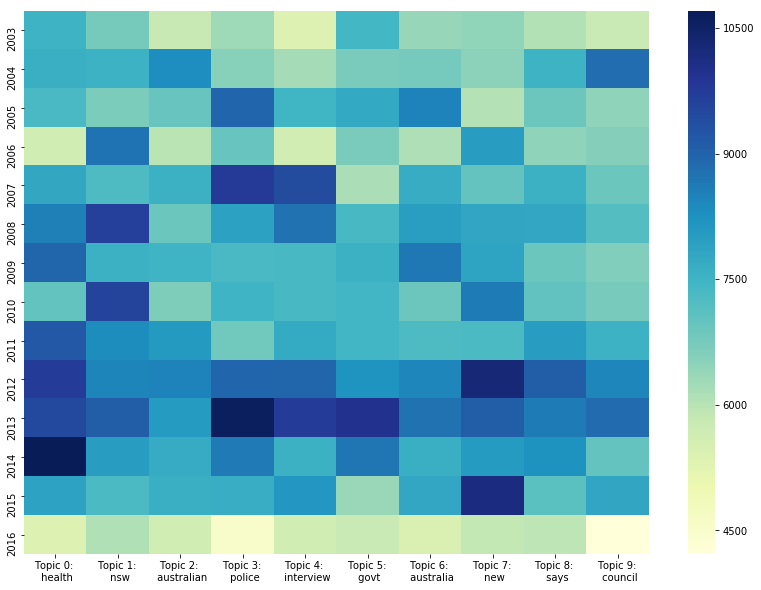

In [66]:

labels = ['Topic {}: \n '.format(i) + ' '.join([topic.split() for topic in top_n_words][i][:3]) for i in range(big_lda_model.n_components)]

fig, ax = plt.subplots(figsize=(14,10))
sb.heatmap(yearly_topic_counts, xticklabels=labels, cmap="YlGnBu", ax=ax)

In [26]:
lda_keys

[3,
 6,
 3,
 0,
 4,
 3,
 3,
 1,
 7,
 7,
 2,
 6,
 2,
 6,
 4,
 2,
 1,
 3,
 5,
 2,
 5,
 1,
 4,
 3,
 6,
 3,
 6,
 6,
 4,
 0,
 7,
 2,
 4,
 3,
 7,
 6,
 6,
 1,
 2,
 4,
 6,
 7,
 7,
 0,
 7,
 7,
 0,
 7,
 3,
 3,
 2,
 3,
 0,
 6,
 1,
 5,
 2,
 3,
 4,
 2,
 3,
 6,
 6,
 3,
 4,
 0,
 5,
 6,
 6,
 4,
 4,
 7,
 5,
 6,
 1,
 6,
 7,
 2,
 2,
 0,
 7,
 1,
 2,
 6,
 0,
 4,
 1,
 1,
 0,
 4,
 6,
 2,
 4,
 6,
 3,
 4,
 1,
 1,
 0,
 1,
 4,
 4,
 6,
 4,
 7,
 3,
 6,
 7,
 0,
 1,
 3,
 0,
 7,
 2,
 3,
 2,
 4,
 1,
 7,
 5,
 0,
 0,
 4,
 2,
 5,
 4,
 2,
 0,
 0,
 2,
 4,
 6,
 2,
 3,
 5,
 3,
 3,
 5,
 7,
 0,
 6,
 6,
 6,
 4,
 4,
 7,
 7,
 5,
 3,
 1,
 5,
 0,
 5,
 3,
 0,
 3,
 3,
 4,
 0,
 0,
 3,
 7,
 2,
 6,
 2,
 2,
 4,
 6,
 2,
 7,
 3,
 2,
 5,
 4,
 5,
 7,
 5,
 1,
 6,
 5,
 2,
 4,
 4,
 7,
 5,
 1,
 5,
 2,
 2,
 5,
 0,
 5,
 1,
 2,
 0,
 7,
 3,
 2,
 5,
 3,
 5,
 6,
 2,
 3,
 4,
 3,
 5,
 3,
 6,
 4,
 1,
 4,
 1,
 0,
 7,
 4,
 2,
 1,
 1,
 5,
 5,
 7,
 6,
 7,
 1,
 1,
 5,
 6,
 6,
 6,
 0,
 5,
 4,
 6,
 0,
 1,
 7,
 7,
 5,
 6,
 1,
 3,
 0,
 0,
 7,
 4,
 7,
 1,
 5,
 5,


In [27]:
top_n_words_lda

['police new world australia cup day country charges hospital sa',
 'market farmers murder set power family dead urged fight missing',
 'health govt new coast gold council rural boost police labor',
 'says man crash pay police court south claims guilty canberra',
 'man court plan council sydney qld charged face wins police',
 'win high centre accused abc public housing darwin review risk',
 'interview says wa nsw school sex killed iraq child report',
 'death water australian home new china car action adelaide opposition']

In [46]:
yearly_data

[array(['aba decides against community broadcasting licence',
        'act fire witnesses must be aware of defamation',
        'a g calls for infrastructure protection summit', ...,
        'with heat on tamworth water use climbs',
        'wolfowitz replaced as guantanamo trial head',
        'your new years eve photos'], dtype=object),
 array(['9 dead as bomb ends aceh new years concert',
        'abandoned pets crowd rspca shelters', 'act water charges double',
        ..., 'youth anti cannabis campaign to be extended',
        'youth in custody after adelaide car chase',
        'zimbabwe confident of successful test return'], dtype=object),
 array(['10 killed in kashmir new year party called off',
        'aftershocks continue to rattle aceh',
        'aid for some aceh survivors weeks away', ...,
        'wa govt puts 5m towards research machine',
        'wenger all but gives up hope of premier league',
        'workcover premiums reduced'], dtype=object),
 array(['adelaide end

In [47]:
yearly_topic_matrices

[array([[0.18750504, 0.35421398, 0.02083334, ..., 0.18742666, 0.02083334,
         0.02083334],
        [0.4250072 , 0.025     , 0.025     , ..., 0.025     , 0.22500223,
         0.025     ],
        [0.22500003, 0.025     , 0.025     , ..., 0.22500113, 0.22499933,
         0.025     ],
        ...,
        [0.02083333, 0.02083333, 0.18749991, ..., 0.02083333, 0.02083333,
         0.18749192],
        [0.18750086, 0.18743981, 0.02083334, ..., 0.02083334, 0.02083334,
         0.02083334],
        [0.025     , 0.025     , 0.30016009, ..., 0.02501164, 0.025     ,
         0.27851669]]),
 array([[0.015625  , 0.015625  , 0.15995753, ..., 0.01562875, 0.14062546,
         0.15523546],
        [0.35418085, 0.02083334, 0.02083334, ..., 0.18749005, 0.02083334,
         0.18749184],
        [0.22500025, 0.025     , 0.22500022, ..., 0.025     , 0.025     ,
         0.02503099],
        ...,
        [0.02083333, 0.52083523, 0.02083333, ..., 0.02083333, 0.02083333,
         0.18749956],
        [0.0

In [52]:
len(topic_matrix)

54615

In [68]:
complete_keys

[3,
 9,
 9,
 4,
 4,
 1,
 6,
 5,
 9,
 6,
 6,
 7,
 0,
 7,
 9,
 1,
 3,
 2,
 7,
 5,
 4,
 0,
 6,
 1,
 0,
 0,
 9,
 5,
 0,
 2,
 7,
 8,
 9,
 4,
 2,
 8,
 2,
 4,
 1,
 1,
 5,
 4,
 3,
 8,
 0,
 4,
 7,
 9,
 2,
 4,
 6,
 7,
 0,
 0,
 0,
 5,
 7,
 2,
 4,
 7,
 8,
 9,
 4,
 8,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 7,
 2,
 0,
 7,
 1,
 9,
 3,
 7,
 5,
 2,
 6,
 6,
 6,
 8,
 2,
 4,
 9,
 3,
 3,
 3,
 3,
 5,
 1,
 4,
 5,
 5,
 6,
 3,
 5,
 5,
 0,
 2,
 3,
 9,
 7,
 2,
 2,
 7,
 9,
 5,
 1,
 2,
 5,
 9,
 1,
 8,
 0,
 5,
 5,
 2,
 1,
 9,
 2,
 0,
 6,
 0,
 5,
 5,
 6,
 3,
 2,
 8,
 3,
 9,
 4,
 1,
 5,
 3,
 3,
 3,
 5,
 0,
 9,
 9,
 5,
 0,
 1,
 3,
 3,
 1,
 0,
 9,
 9,
 8,
 6,
 0,
 9,
 1,
 9,
 8,
 8,
 4,
 8,
 4,
 5,
 4,
 9,
 5,
 1,
 6,
 8,
 8,
 3,
 7,
 6,
 4,
 5,
 7,
 9,
 3,
 3,
 7,
 9,
 8,
 7,
 5,
 6,
 2,
 7,
 1,
 1,
 6,
 0,
 3,
 9,
 0,
 6,
 3,
 4,
 8,
 9,
 9,
 6,
 1,
 5,
 6,
 1,
 7,
 5,
 2,
 9,
 5,
 3,
 0,
 6,
 4,
 9,
 2,
 5,
 9,
 7,
 0,
 1,
 1,
 5,
 1,
 6,
 6,
 9,
 2,
 7,
 7,
 2,
 9,
 0,
 9,
 0,
 9,
 7,
 4,
 7,
 9,
 6,
 0,
 9,
 3,
 4,
 2,
 2,


In [69]:
complete_topic_matrix

array([[0.183336  , 0.01666667, 0.18332218, ..., 0.01666667, 0.01666667,
        0.01666667],
       [0.02      , 0.02      , 0.02      , ..., 0.21999873, 0.02      ,
        0.42000101],
       [0.21999987, 0.02      , 0.21999995, ..., 0.02      , 0.02      ,
        0.42000019],
       ...,
       [0.01428571, 0.30000021, 0.01428571, ..., 0.01428571, 0.01428571,
        0.15714285],
       [0.18333317, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667],
       [0.18332588, 0.01666667, 0.35000426, ..., 0.01666667, 0.18333506,
        0.01666667]])

In [71]:
big_lda_model.n_components

10

In [73]:
print(complete_document_term_matrix)

  (0, 1329)	1
  (0, 5450)	1
  (0, 7777)	1
  (0, 9382)	1
  (0, 19254)	1
  (1, 1582)	1
  (1, 3340)	1
  (1, 9456)	1
  (1, 35937)	1
  (2, 6053)	1
  (2, 16819)	1
  (2, 25861)	1
  (2, 31727)	1
  (3, 1928)	1
  (3, 3213)	1
  (3, 23091)	1
  (3, 24298)	1
  (3, 27845)	1
  (3, 30972)	1
  (3, 31455)	1
  (4, 1775)	1
  (4, 1928)	1
  (4, 3232)	1
  (4, 23091)	1
  (4, 31455)	1
  :	:
  (1103659, 36271)	1
  (1103660, 2926)	1
  (1103660, 5158)	1
  (1103660, 9281)	1
  (1103660, 19481)	1
  (1103660, 21460)	1
  (1103660, 22463)	1
  (1103660, 30293)	1
  (1103660, 32643)	1
  (1103660, 35230)	1
  (1103661, 5420)	1
  (1103661, 12792)	1
  (1103661, 22607)	1
  (1103661, 32950)	1
  (1103661, 36344)	1
  (1103662, 503)	1
  (1103662, 3230)	1
  (1103662, 18182)	1
  (1103662, 20820)	1
  (1103663, 20814)	1
  (1103663, 20896)	1
  (1103664, 1908)	1
  (1103664, 6093)	1
  (1103664, 13942)	1
  (1103664, 33660)	1


In [74]:
lda_categories

[9, 5, 0, 7, 1, 8, 4, 2, 6, 3]

<54615x36581 sparse matrix of type '<class 'numpy.int64'>'
	with 327275 stored elements in Compressed Sparse Row format>